In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [2]:
tweets=pd.read_csv("/content/drive/MyDrive/datasets_learned/COVIDSenti-A.csv")

In [3]:
tweets

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [4]:
#checking for null values
tweets.isnull().sum()

tweet    0
label    0
dtype: int64

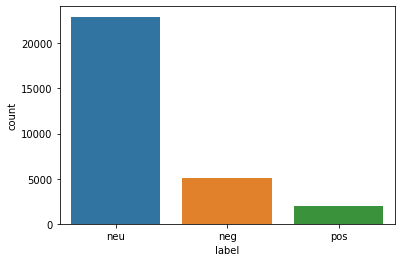

In [5]:
#count of sentiments
sns.countplot(x ='label', data =tweets)

In [6]:
tweets["tweet"][10]

'China identifies new strain of coronavirus as source of pneumonia outbreak https://t.co/qy1kFhTHDl'

In [7]:
import re

# Define a regular expression pattern for URLs, non-alphabetic characters, and user names
pattern = re.compile(r'https?://\S+|[^0-9A-Za-z t]|@\w+')

# Define a function that takes a string and removes URLs, non-alphabetic characters, and user names from it
def clean_tweet(text):
  # Use the regular expression to find all URLs, non-alphabetic characters, and user names in the text
  matches = pattern.findall(text)

  # Replace the URLs, non-alphabetic characters, and user names with an empty string
  for match in matches:
    text = text.replace(match, '')

  # Return the modified text
  return text


In [8]:
tweets['tweet'] = tweets['tweet'].apply(clean_tweet)

In [9]:
print(tweets["tweet"][10])

China identifies new strain of coronavirus as source of pneumonia outbreak 


In [10]:
#converting tweets into lower case
tweets["tweet"]=tweets["tweet"].str.lower()

In [11]:
#train test split
X=tweets["tweet"]
y=tweets["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(max_features = 5000,stop_words=None)

In [14]:
vectoriser.fit(tweets["tweet"])
X_train_tfidf = vectoriser.transform(X_train)
X_test_tfidf = vectoriser.transform(X_test)
# Encoding the classes in numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)


In [15]:
#model
from sklearn.svm import SVC
# Create an SVM classifier
classifier = SVC(probability = True, kernel = 'linear')
# Train the classifier on the training set
classifier.fit(X_train_tfidf,y_train)
# Make predictions on the testing set
y_pred = classifier.predict(X_test_tfidf)
y_pred=y_pred.reshape(-1,1)



In [16]:
Predicted_data = pd.DataFrame()
Predicted_data['Tweet'] = X_test
Predicted_data['Label'] = y_pred
Predicted_data

,Tweet,Label
2308,stay safe and healthy my moots whose countries...,2
22404,this covid2019 corona virus is thanos crazy,0
23397,end of the world coronavirus panic and african...,1
25058,to prevent spread of covid19 hong kong diocese...,1
2664,chinese leader warns of grave coronavirus cris...,1
...,...,...
3672,yooocoronaviruskobe passing wtf 2020 this not ...,0
9812,on the day of brexit two confirmed cases of co...,1
19631,chinas xi to prevent major layoffs amid corona...,1
27301,cherykang cnbci im legitimately worried about ...,0


In [17]:
Predicted_data['Label']=encoder.inverse_transform(Predicted_data['Label'])

In [21]:
Predicted_data

,Tweet,Label
2308,stay safe and healthy my moots whose countries...,pos
22404,this covid2019 corona virus is thanos crazy,neg
23397,end of the world coronavirus panic and african...,neu
25058,to prevent spread of covid19 hong kong diocese...,neu
2664,chinese leader warns of grave coronavirus cris...,neu
...,...,...
3672,yooocoronaviruskobe passing wtf 2020 this not ...,neg
9812,on the day of brexit two confirmed cases of co...,neu
19631,chinas xi to prevent major layoffs amid corona...,neu
27301,cherykang cnbci im legitimately worried about ...,neg


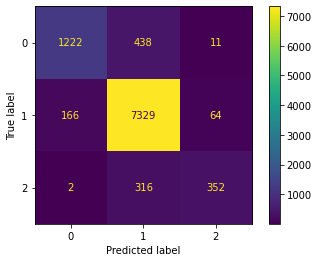

In [18]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [25]:
# results
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1671
           1       0.91      0.97      0.94      7559
           2       0.82      0.53      0.64       670

    accuracy                           0.90      9900
   macro avg       0.87      0.74      0.79      9900
weighted avg       0.90      0.90      0.89      9900



In [19]:
#accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
print(acc*100)

89.92929292929293


**ACCURACY ACHIEVED:89.929**

In [29]:
Predicted_data.head(5)

,Tweet,Label
2308,stay safe and healthy my moots whose countries...,pos
22404,this covid2019 corona virus is thanos crazy,neg
23397,end of the world coronavirus panic and african...,neu
25058,to prevent spread of covid19 hong kong diocese...,neu
2664,chinese leader warns of grave coronavirus cris...,neu


In [39]:
Predicted_data[Predicted_data["Label"]=="pos"].loc[2308,'Tweet']

'stay safe and healthy my moots whose countries get infected with coronavirus especially to my malaysian moots'

In [40]:
new="Quarantine is boring"
vector=vectoriser.transform([new])
pred=classifier.predict(vector)
print(encoder.inverse_transform(pred))

['neu']


In [43]:
new2="Covid made a terrible future"
vector=vectoriser.transform([new2])
pred=classifier.predict(vector)
print(encoder.inverse_transform(pred))

['neg']
